In [ ]:
import requests 
import unicodedata
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, AutoTokenizer

In [ ]:
processor = TrOCRProcessor.from_pretrained("ddobokki/ko-trocr") 
model = VisionEncoderDecoderModel.from_pretrained("ddobokki/ko-trocr")
tokenizer = AutoTokenizer.from_pretrained("ddobokki/ko-trocr")

# url = "https://raw.githubusercontent.com/ddobokki/ocr_img_example/master/g.jpg"
# response = requests.get(url)
# img = Image.open(BytesIO(response.content))

img = Image.open("/home/pervinco/upstage-cv-classification-cv7/dataset/test/0a46d57f7a0b0407.jpg")

plt.imshow(img)

In [ ]:
pixel_values = processor(img, return_tensors="pt").pixel_values 
generated_ids = model.generate(pixel_values, max_length=64)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_text = unicodedata.normalize("NFC", generated_text)
print(generated_text)


In [1]:
import cv2
import pytesseract

In [3]:
# 이미지 파일 경로
image_path = "/home/pervinco/upstage-cv-classification-cv7/dataset/train/0a4adccbb7fe73e0.jpg"

# 이미지 로드
image = cv2.imread(image_path)

# 이미지를 RGB로 변환 (Tesseract는 RGB 이미지를 필요로 함)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tesseract로 OCR 수행 (한국어 설정)
custom_config = r'--oem 3 --psm 6 -l kor'
text = pytesseract.image_to_string(rgb_image, config=custom_config)

# 결과 출력
print(text)

=         .
건강보험 임신ㆍ출산 진료비 지원 신청 및 잉신확인서
에 |ㅠ0001 =
       들
< 요양기관 확인란(임신확인서) > 꽤
| | 6 2070201210! .미즈미댄으 (디디 )
대 | 0 | 를
고은 시큐어 3 261 의의 외신: 스시 지켜 이브디1
때. 0
때...    ,



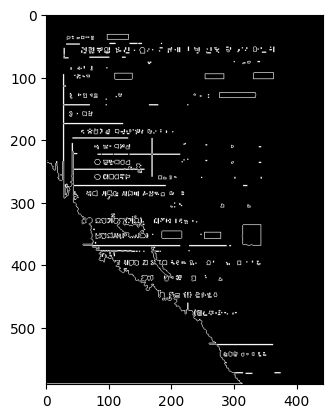

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_character_contours(image_path):
    # 이미지 읽기
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 이진화
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # 노이즈 제거
    kernel = np.ones((2,2), np.uint8)
    denoised = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # 윤곽선 찾기
    contours, _ = cv2.findContours(denoised, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 결과 이미지 (검은 배경에 흰색 윤곽선)
    result = np.zeros(image.shape, dtype=np.uint8)
    
    # 윤곽선 그리기
    cv2.drawContours(result, contours, -1, (255,255,255), 1)
    
    return result

# 사용 예
image_path = "/home/pervinco/upstage-cv-classification-cv7/dataset/train/0a4adccbb7fe73e0.jpg"
contour_image = extract_character_contours(image_path)

plt.imshow(contour_image)